<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общая-выборка" data-toc-modified-id="Общая-выборка-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общая выборка</a></span></li><li><span><a href="#Центр-Санкт-Петербурга" data-toc-modified-id="Центр-Санкт-Петербурга-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Центр Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

Рассмотрим общую информацию о данных таблицы. Всего в таблице 23699 наблюдений и 22 столбца: 3 - с числовыми данными, 2 - с булевыми значениями и 17 - типа object.
В ряде переменных имеются пропуски.

In [2]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Каждая строка таблицы содержит информацию об одном жилом объекте. 
Для проверки рабочих гипотез особенно ценны столбцы:
- living_area, kitchen_area, total_area* - площадь (жилая, кухня и общая) 
- last_price* - цена
- ceiling_height - высота потолков  
- days_exposition - время продажи квартиры (сколько дней было размещено объявление от публикации до снятия)
- rooms* - число комнат 
- cityCenters_nearest - удалённость от центра
- floor* - этаж
- first_day_exposition* - дата размещения объявления

*в данных столбцах нет пропусков данных

In [3]:
print(df['floor'].sort_values().unique())
print(df['rooms'].sort_values().unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 19]


Расммотрим уникальные значения переменных, для которых это возможно сделать. 
Варианты количества этажей выглядят правдоподобно. А вот 0 комнат и 6-ти и более -комнатное жилье кажется странным. Вернемся к этому после замены типа данных.

## Предобработка данных

### Замена типа данных

In [5]:
df['living_area'] = df['living_area'].astype('float')
df['kitchen_area'] = df['kitchen_area'].astype('float')
df['total_area'] = df['total_area'].astype('float')
df['ceiling_height'] = df['ceiling_height'].astype('float')
df['days_exposition'] = df['days_exposition'].astype('float')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('float')
 
df['last_price'] = df['last_price'].astype('float').astype('int')

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Для удобства дальнейшего анализа переведем типы данных интересующих нас переменных в подходящие:
- площади и высоту потолка в float. days_exposition и cityCenters_nearest тоже переведем в float, тк в столбцах имеются пропуски, а заменить их на основе имеющихся данных мы не можем
- цену, удаленность от центра и количества дней размещения - в целочисленный формат
- дату публикации объявления - в формат даты

In [6]:
print(df[df['living_area']<6]['living_area'].count())
df = df.drop(df[df['living_area'] < 6].index)

6


Теперь вернемся к подозрительным значениям rooms. Для того, чтобы посмотреть соотношение количества комнат и жилплощади, избавимся от нереалистично маленьких значений жилплощади. Минимальная санитарная норма жилплощади в РФ составляет 6 кв метров. Всего значений меньше этого значения в датасете 6 штук. Удалим эти строки.

195
195
90


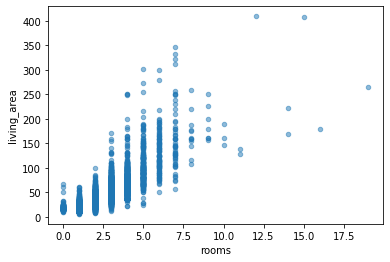

In [7]:
print(df.query('rooms==0')['rooms'].count())
print(df.query('rooms==0 and (studio==True or open_plan==True)')['rooms'].count())

df.plot(kind='scatter', x='rooms', y='living_area', alpha = 0.5)

print(df[df['rooms'] > 6]['rooms'].count())
df = df.drop(df[df['rooms'] > 6].index)

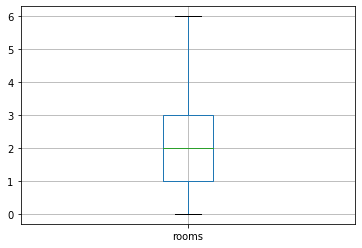

In [8]:
df.boxplot('rooms')

Все жилье с нулевым числом комнат относится либо к студиям, либо к квартирам с открытой планировкой. На диаграмме рассеяния видим, что это, как правило, жилье с относительно маленькой жилплощадью. Не будем заменять/исключать нули в столбце rooms.
Больше 6 комнат - явление довольно редкое, удалим 89 жилых объектов, в которых 7 и больше комнат.

### Обработка пропусков

In [9]:
print(df['living_area'].corr(df['total_area']))
print(df['living_area'].corr(df['rooms']))

0.9333177375702164
0.8406801585421108


Для замены пропусков в столбце living_area корреляцию его значений со значениями total_area и rooms - корреляция положительная и довольно высокая, это согласуется с физическим смыслом даных переменных. 

In [10]:
print(df['total_area'].describe())

def define_total_area_group(total_area):
    if total_area <= 40:
        return 'small'
    if total_area <= 52:
        return 'medium_small'
    if total_area <= 69:
        return 'medium_big'
    return 'big'

df['total_area_group'] = df['total_area'].apply(define_total_area_group)

count    23603.000000
mean        59.515137
std         32.013501
min         12.000000
25%         40.000000
50%         52.000000
75%         69.200000
max        507.000000
Name: total_area, dtype: float64


Напишем функцию для распределения total_area по квартилям и применим ее к данному столбцу.

In [11]:
living_area_median_pivot = df.pivot_table(index=['total_area_group', 'rooms'], values='living_area', aggfunc='median').reset_index()
living_area_median_pivot.head()

,total_area_group,rooms,living_area
0,big,0,60.50
1,big,1,38.60
2,big,2,39.70
3,big,3,49.87
4,big,4,67.00


Создадим сводную по числу комнат и группам общей площади. 

In [12]:
import math

def fill_living_area(x):
    living_area_median_col = living_area_median_pivot[
                              (living_area_median_pivot['total_area_group'] == x['total_area_group'])&
                              (living_area_median_pivot['rooms'] == x['rooms'])
                            ]['living_area']
    living_area_group_median = living_area_median_col.iloc[0] if len(living_area_median_col) > 0 else 0
    return living_area_group_median if math.isnan(x['living_area']) else x['living_area']

df.loc[:, 'living_area'] = df.apply(fill_living_area, axis=1)

Напишем функцию, которая по группе условий подтягивает значения медианной жилплощади из сводной таблицы living_area_median_pivot в столбец living_area исходного датафрейма.

In [13]:
df['non_leaving_area'] = df['total_area'] - df['living_area']
print(df[df['non_leaving_area']<6]['non_leaving_area'].count())
df = df.drop(df[df['non_leaving_area'] < 6].index)
print(df['kitchen_area'].corr(df['non_leaving_area']))

148
0.7267626457697283


Вероятнее всего размер кухни сильнее всего коррелирует с нежилой площадью жилья. Создадим столбец non_leaving_area, значения которого равны разности общей и жилой площадей. 
В новом столбце проверим аномальные значения. Предположим, что нежилая площадь (включая санузел, кухню, коридор, балкон) также не может быть меньше 6 кв м. Всего значений меньше 6 в датасете 149 штук - это меньше 1% оставшейся выборки. Избавимся также от этих значений.
Корреляция средняя, но за неимением лучшего используем группировку по non_leaving_area для расчета групповых медиан площади кухни.

In [14]:
print(df['non_leaving_area'].describe())

def define_non_leaving_area_group(non_leaving_area):
    if non_leaving_area <= 17:
        return 'small'
    if non_leaving_area <= 22:
        return 'medium_small'
    if non_leaving_area <= 29:
        return 'medium_big'
    return 'big'

df['non_leaving_area_group'] = df['non_leaving_area'].apply(define_non_leaving_area_group)

count    23455.000000
mean        25.781847
std         16.374505
min          6.000000
25%         17.000000
50%         22.000000
75%         29.000000
max        455.500000
Name: non_leaving_area, dtype: float64


In [15]:
kitchen_area_median_pivot = df.pivot_table(index=['non_leaving_area_group'], values='kitchen_area', aggfunc='median').reset_index()
kitchen_area_median_pivot.head()

,non_leaving_area_group,kitchen_area
0,big,14.0
1,medium_big,10.0
2,medium_small,8.4
3,small,6.2


In [16]:
def fill_kitchen_area(x):
    kitchen_area_median_col = kitchen_area_median_pivot[
                              kitchen_area_median_pivot['non_leaving_area_group'] == x['non_leaving_area_group']
                            ]['kitchen_area']
    kitchen_area_group_median = kitchen_area_median_col.iloc[0] if len(kitchen_area_median_col) > 0 else 0
    return kitchen_area_group_median if math.isnan(x['kitchen_area']) else x['kitchen_area']

df.loc[:, 'kitchen_area'] = df.apply(fill_kitchen_area, axis=1)

По аналогии заполняем пропуски в kitchen_area.

72
count    14296.000000
mean         2.769140
std          1.251338
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


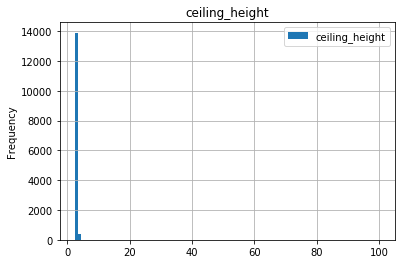

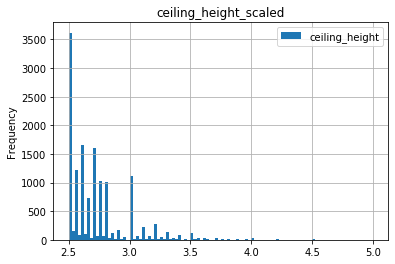

In [17]:
print(df[df['ceiling_height']<2.5]['ceiling_height'].count())
df = df.drop(df[df['ceiling_height']<2.5].index)
print(df['ceiling_height'].describe())
df.plot(y='ceiling_height', kind='hist', bins=100, grid=True, title='ceiling_height')
df.plot(y='ceiling_height', kind='hist', bins=100, range=(2.5, 5), grid=True, title='ceiling_height_scaled')

In [18]:
print(df[df['ceiling_height']>5]['ceiling_height'].count())
df = df.drop(df[df['ceiling_height']>5].index)

34


Санитарная норма высоты потолков составляет 2,5 метра. Значений ниже этого числа в выборке 72, избавимся от них.
Описательная статистика показывает, что в ceiling_height есть также аномально большие значения. На графике видим, что типичное значение высоты потолка не превышает 5 метров. Значений больше 5 в таблице всего 34 - удалим и их тоже.

In [20]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [21]:
df.isnull().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                 86
living_area                   0
floor                         0
is_apartment              20628
studio                        0
open_plan                     0
kitchen_area                  0
balcony                   11347
locality_name                49
airports_nearest           5438
cityCenters_nearest        5416
parks_around3000           5415
parks_nearest             15407
ponds_around3000           5415
ponds_nearest             14383
days_exposition            3125
total_area_group              0
non_leaving_area              0
non_leaving_area_group        0
dtype: int64

In [22]:
df.dropna(subset = ['locality_name'], inplace = True)
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(0)

In [23]:
df.isnull().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                 85
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
locality_name                 0
airports_nearest           5430
cityCenters_nearest        5408
parks_around3000           5407
parks_nearest             15373
ponds_around3000           5407
ponds_nearest             14359
days_exposition            3124
total_area_group              0
non_leaving_area              0
non_leaving_area_group        0
dtype: int64

In [24]:
df.duplicated().sum()

0

Проверим, что в датасете нет дубликатов.

## Расчёты и добавление результатов в таблицу

In [25]:
df['sq_meter_price'] = df['last_price']/df['total_area']

Добавим столбец с ценой квадратного метра для каждого жилого объекта.

In [26]:
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year

Добавим в таблицу неделю, месяц и год публикации объявления.

In [27]:
df.dropna(subset = ['floors_total'], inplace = True)
df['floors_total'] = df['floors_total'].astype('float').astype('int')

Чтобы понять, является ли этаж последним, нужно сравнить его с общим количеством этажей в доме. Для этого переведем floors_total в целочисленный формат. Всего имеем 86 пропусков в floors_total. Это около 3%, но заменить эти пропуски на основе имеющихся данных будет сложно. Удалим их.

In [28]:
def define_floor_group(x):
     return 'первый' if  x['floor'] == 1 else 'последний' if x['floor'] == x['floors_total'] else 'другой'

df.loc[:, 'floor_group'] = df.apply(define_floor_group, axis=1)

Добавим категоризацию по этажам квартиры. Разделим все этажи на первый, последний и другой. Если всего в доме 1 этаж, то будем считать, что квартира расположена на первом этаже, а не на последнем.

In [29]:
df['living_to_total_area'] = df['living_area'] / df['total_area']
df['kitchen_to_total_area'] = df['kitchen_area'] / df['total_area']

Добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Исследовательский анализ данных

### Общая выборка

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

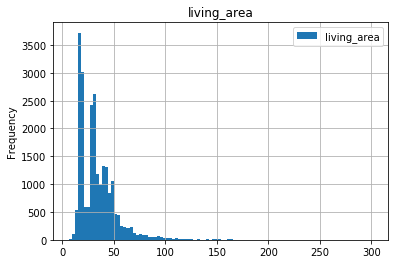

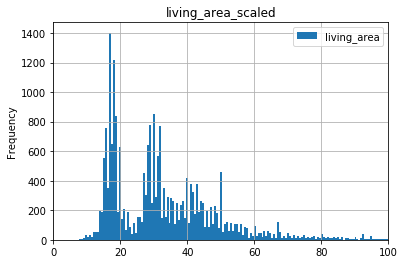

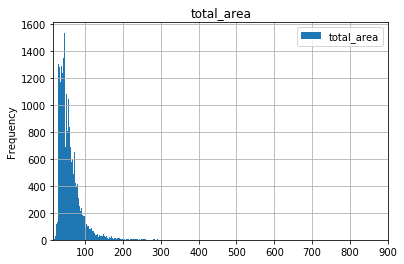

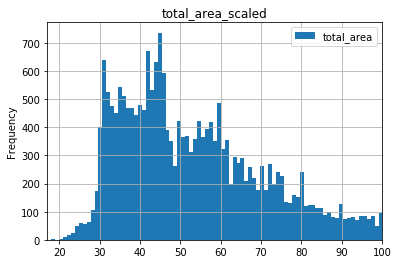

In [30]:
df.plot(y='living_area', bins=100, kind='hist', grid=True, title='living_area')
df.plot(y='living_area', xlim=(0, 100), bins=500, kind='hist', grid=True, title='living_area_scaled')
df.plot(y='total_area', xlim=(17, 901), bins=200, kind='hist', grid=True, title='total_area')
df.plot(y='total_area', xlim=(17, 100), bins=500, kind='hist', grid=True, title='total_area_scaled')

- Основная часть значений жилплощади лежит в диапазоне от 1 до 100. Видим четыре пика - в районе 18, 30, 40 и 50 кв. метров. Это может быть связано с наиболее типичными вариантами жилья в Питере и области, например 15 - для однушки, 30 - для двушки и тд.
- Распределение значений total_area имеет наивысший пик в районе 45 кв. м. В целом этот результат согласуется с распределением значений жилой площади.

1


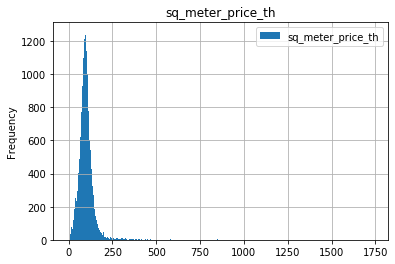

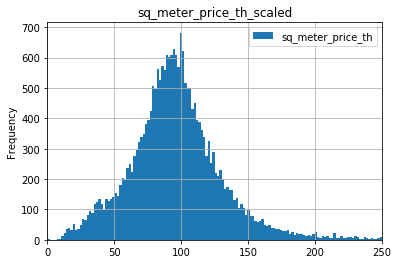

In [31]:
df['sq_meter_price_th'] = df['sq_meter_price'].div(1000)

df.plot(y='sq_meter_price_th', bins=500, kind='hist', grid=True, title='sq_meter_price_th')
df.plot(y='sq_meter_price_th', xlim=(0, 250), bins=1000, kind='hist', grid=True, title='sq_meter_price_th_scaled')

print(df[df['sq_meter_price'] < 7000]['sq_meter_price'].count())
df = df.drop(df[df['sq_meter_price'] < 7000].index)

Для наглядности создадим переменнуюю sq_meter_price_th, в которой цена за кв.м поделена на тысячу.

Распределение цены за квадратный метр похоже на нормальное и имеет пик в районе 100 тыс. руб. Странно выглядит только минимальное значение в 111 руб. К счастью, оно всего одно, удалим эту строку. 

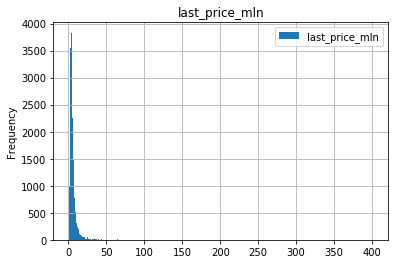

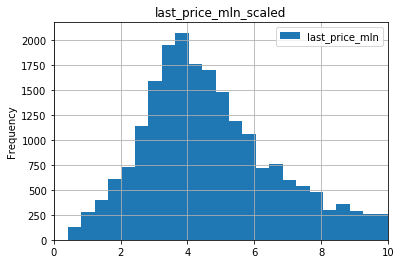

In [32]:
df['last_price_mln'] = df['last_price'].div(1000000)
df.plot(y='last_price_mln', bins=500, kind='hist', grid=True, title='last_price_mln')
df.plot(y='last_price_mln', bins=1000, xlim=(0, 10), kind='hist', grid=True, title='last_price_mln_scaled')

Для удобства анализа создадим столбец last_price_mln, где цена last_price переведена в миллионы. Самое частое значение близко к 4 миллионам и выглядит реалистично.

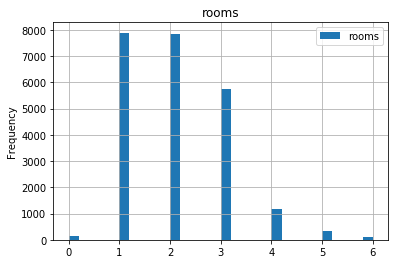

In [33]:
df.plot(y='rooms', bins=30, kind='hist', grid=True, title='rooms')

Основная часть наблюдений сосредоточена в промежутке от 1 до 3, при этом чаще всего встречаются однушки и двушки, чуть реже - трешки. Есть отдельные квартиры с 0 и 6 комнатами, но это редкость.

2.5
5.0


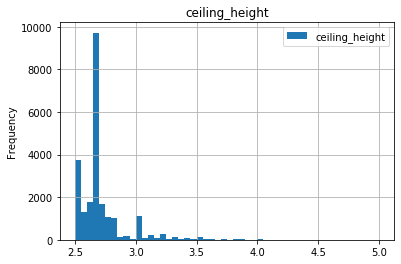

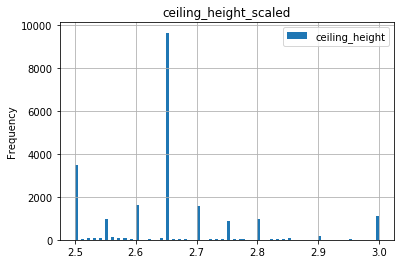

In [34]:
print(df['ceiling_height'].min())
print(df['ceiling_height'].max())
df.plot(y='ceiling_height', bins=50, kind='hist', grid=True, title='ceiling_height')
df.plot(y='ceiling_height', kind='hist', bins=100, range=(2.5, 3), grid=True, title='ceiling_height_scaled')

Обычная высота потолков составляет 2,65 метра, реже встречаются 2,5, 2,6 и 2,7 метра. Более высокие значения редки, но возможны, например, в элитных домах либо в реконструированных домах дореволюционной постройки.

1.0
1580.0
180.98701427931738
95.0
19


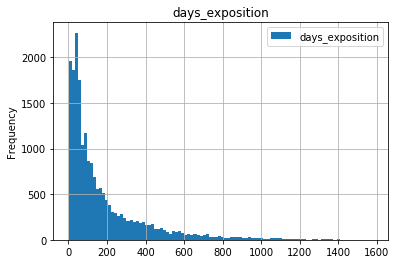

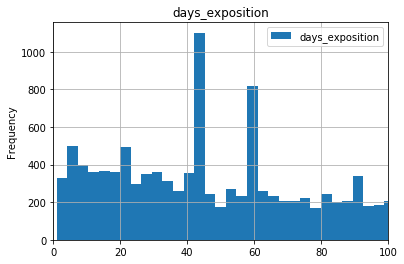

In [35]:
print(df['days_exposition'].min())
print(df['days_exposition'].max())
print(df['days_exposition'].mean())
print(df['days_exposition'].median())
df.plot(y='days_exposition', bins=100, kind='hist', grid=True, title='days_exposition')
df.plot(y='days_exposition', xlim=(0, 100), bins=500, kind='hist', grid=True, title='days_exposition')

print(df[df['days_exposition'] > 1400]['days_exposition'].count())
df = df.drop(df[df['days_exposition'] > 1400].index)

Среднее значение времени продажи квартиры составляет 180 дней, а медиана  - 95 дней. Значит, есть отдельные очень большие значения days_exposition, которые перетягивают на себя значение среднего. Значения больше 1400 встречаются редко, удалим 19 таких наблюдений. 1400 тоже довольно большое число - это почти 4 года. Однако, в реальной жизни встречается и такое: время продажи возрастает с ростом числа комнат и элитности квартиры, либо наоборот - из-за плохого состояния квартиры, а также из-за чрезмерно высокой или подозрительно низкой цены.

count    20080.000000
mean       179.757620
std        216.357126
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1396.000000
Name: days_exposition, dtype: float64

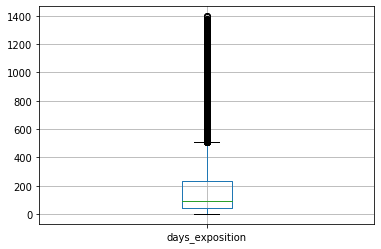

In [36]:
df.boxplot('days_exposition')
df['days_exposition'].describe()

Чаще всего продажа квартиры занимает около 3 месяцев. Если покупатель нашелся раньше 1,5 месяцев - можно считать, что продажи прошли очень быстро. Необычно долгим сроком для продажи квартир можно считать 400+ дней.

In [37]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,non_leaving_area,sq_meter_price,exposition_weekday,exposition_month,exposition_year,living_to_total_area,kitchen_to_total_area,sq_meter_price_th,last_price_mln
count,23195.000000,2.319500e+04,23195.000000,23195.000000,23195.000000,23195.000000,23195.000000,23195.000000,23195.000000,17799.000000,20080.000000,23195.000000,2.319500e+04,23195.000000,23195.000000,23195.000000,23195.000000,23195.000000,23195.000000,23195.000000
mean,9.897133,6.373839e+06,59.630289,2.052899,2.695142,10.692994,33.883757,5.884329,10.390279,14245.390471,179.757620,25.746532,9.911163e+04,2.569735,6.399655,2017.372408,0.561892,0.187250,99.111625,6.373839
std,5.674990,8.698606e+06,31.846560,1.002241,0.211813,6.586491,19.554151,4.870871,5.553956,8609.636834,216.357126,16.225074,4.833940e+04,1.787373,3.491766,1.035107,0.103435,0.070985,48.339395,8.698606
min,0.000000,4.300000e+05,18.000000,0.000000,2.500000,1.000000,6.000000,1.000000,1.300000,181.000000,1.000000,6.000000,7.962963e+03,0.000000,1.000000,2014.000000,0.078122,0.028000,7.962963,0.430000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,9330.500000,45.000000,17.000000,7.656250e+04,1.000000,3.000000,2017.000000,0.491562,0.134963,76.562500,3.450000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,13138.000000,95.000000,22.000000,9.491525e+04,3.000000,6.000000,2017.000000,0.566075,0.173653,94.915254,4.650000
75%,14.000000,6.750000e+06,69.300000,3.000000,2.700000,16.000000,42.000000,8.000000,12.000000,16296.000000,231.000000,29.000000,1.140892e+05,4.000000,10.000000,2018.000000,0.636017,0.230769,114.089233,6.750000
max,50.000000,4.013000e+08,507.000000,6.000000,5.000000,60.000000,301.500000,33.000000,107.000000,65968.000000,1396.000000,455.500000,1.736842e+06,6.000000,12.000000,2019.000000,0.927500,0.787879,1736.842105,401.300000


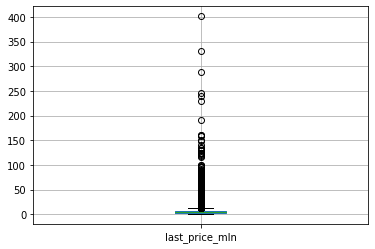

In [38]:
df.boxplot('last_price_mln')

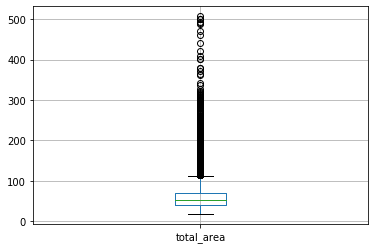

In [39]:
df.boxplot('total_area')

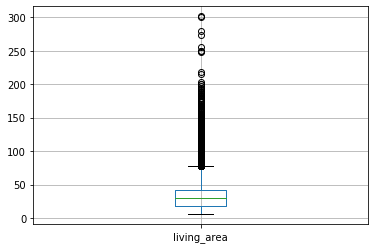

In [40]:
df.boxplot('living_area')

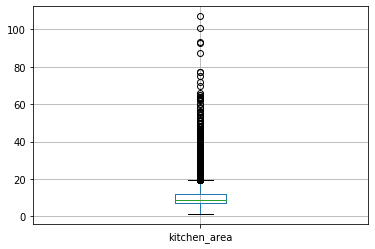

In [41]:
df.boxplot('kitchen_area')

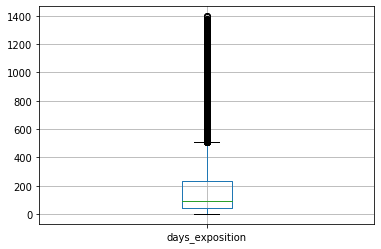

In [42]:
df.boxplot('days_exposition')

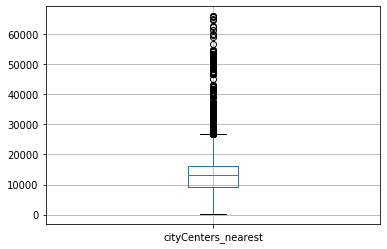

In [43]:
df.boxplot('cityCenters_nearest')

In [44]:
df_clean = pd.DataFrame(df.query('(last_price_mln<12)&(total_area<120)&(living_area<160)&(kitchen_area<20)&(days_exposition<500)&(cityCenters_nearest<260000)'))
df_clean.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,non_leaving_area,sq_meter_price,exposition_weekday,exposition_month,exposition_year,living_to_total_area,kitchen_to_total_area,sq_meter_price_th,last_price_mln
count,12718.000000,1.271800e+04,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000
mean,9.697515,5.252118e+06,52.728755,1.909262,2.673408,11.496698,30.223228,6.231247,9.269416,15128.989228,122.363736,22.505527,100928.853163,2.589715,6.602610,2017.359884,0.562965,0.186671,100.928853,5.252118
std,5.561563,1.974084e+06,17.730890,0.888592,0.177318,6.581070,12.871860,4.974867,2.941326,8351.888605,117.155466,7.819597,22812.776037,1.780543,3.466094,0.849435,0.099176,0.062914,22.812776,1.974084
min,0.000000,1.200000e+06,18.000000,0.000000,2.500000,1.000000,6.000000,1.000000,2.000000,208.000000,1.000000,6.000000,15345.268542,0.000000,1.000000,2015.000000,0.141304,0.043524,15.345269,1.200000
25%,6.000000,3.800000e+06,39.000000,1.000000,2.600000,5.000000,18.200000,3.000000,7.000000,10879.250000,36.000000,16.900000,85454.545455,1.000000,3.000000,2017.000000,0.497483,0.138131,85.454545,3.800000
50%,9.000000,4.750000e+06,48.700000,2.000000,2.650000,9.000000,29.000000,5.000000,8.900000,13732.000000,79.000000,21.000000,98333.333333,3.000000,7.000000,2017.000000,0.566572,0.176471,98.333333,4.750000
75%,14.000000,6.300000e+06,63.000000,3.000000,2.690000,16.000000,39.000000,9.000000,11.000000,16743.500000,174.750000,26.800000,113252.259036,4.000000,10.000000,2018.000000,0.634528,0.229167,113.252259,6.300000
max,35.000000,1.199900e+07,119.600000,6.000000,4.500000,60.000000,92.750000,33.000000,19.900000,64857.000000,499.000000,93.700000,312240.000000,6.000000,12.000000,2019.000000,0.927500,0.739837,312.240000,11.999000


Сформируем срез df_clean, очищенный от выбросов по переменным last_price, total_area, living_area, kitchen_area, days_exposition, cityCenters_nearest. Границы выбросов определяем по ящикам с усами.

In [45]:
print('total_area', df_clean['sq_meter_price'].corr(df_clean['total_area']))
print('living_area', df_clean['sq_meter_price'].corr(df_clean['living_area']))
print('kitchen_area', df_clean['sq_meter_price'].corr(df_clean['kitchen_area']))
print('rooms', df_clean['sq_meter_price'].corr(df_clean['rooms']))
print('cityCenters_nearest', df_clean['sq_meter_price'].corr(df_clean['cityCenters_nearest']))

total_area -0.17241392955741286
living_area -0.25426290937869495
kitchen_area 0.19053812000630221
rooms -0.32658507059823866
cityCenters_nearest -0.3965116647222406


Цена за квадратный метр отрицательно зависит от общей и жилой площади, числа комнат и удаленности от центра, при этом удаленность от центра влияет на цену сильнее других параметров.
Увеличение площади кухни связана с ростом цены.
Однако корреляция во всех случаях довольно слабая.

In [46]:
print('total_area', df_clean['last_price'].corr(df_clean['total_area']))
print('living_area', df_clean['last_price'].corr(df_clean['living_area']))
print('kitchen_area', df_clean['last_price'].corr(df_clean['kitchen_area']))
print('rooms', df_clean['last_price'].corr(df_clean['rooms']))
print('cityCenters_nearest', df_clean['last_price'].corr(df_clean['cityCenters_nearest']))

total_area 0.7821034643082779
living_area 0.6577162302223962
kitchen_area 0.5177736849964433
rooms 0.5123028267735047
cityCenters_nearest -0.34494395851298504


Общая цена квартиры сильнее всего зависит от общей и жилой площадей (корреляция выше средней). Примерно одинаково влияют на рост цены площадь кухни и число комнат. Удаленность от центра снижает цену жилья.

In [47]:
price_weekday_pivot = df_clean.pivot_table(index=['exposition_weekday'], values=['last_price_mln', 'sq_meter_price_th'], aggfunc='median').reset_index()
price_weekday_pivot

,exposition_weekday,last_price_mln,sq_meter_price_th
0,0,4.75,97.942584
1,1,4.80,98.387097
2,2,4.75,99.049069
3,3,4.75,98.943325
4,4,4.70,97.203274
5,5,4.75,98.566308
6,6,4.69,98.786115


Самая низкая цена за квадратный метр - в объявлениях, размещенных в понедельник и пятницу, самая высокая - в среду. При этом квартиры с наибольшей общей ценой выставляются на продажу во вторник, с наименьшей - в воскресенье. 

In [48]:
price_month_pivot = df_clean.pivot_table(index=['exposition_month'], values=['last_price_mln', 'sq_meter_price_th'], aggfunc='median').reset_index()
price_month_pivot

,exposition_month,last_price_mln,sq_meter_price_th
0,1,4.75,100.000000
1,2,4.79,98.484848
2,3,4.75,99.834278
3,4,4.80,97.619048
4,5,4.70,95.238095
5,6,4.60,96.984848
6,7,4.75,98.113208
7,8,4.75,99.827883
8,9,4.77,98.740752
9,10,4.65,97.467949


Самые высокие цены за квадрат наблюдаются в объявлениях, размещенных в декабре-марте и в июле-сентябре. Самые низкие - в мае (возможно, связано со снижением деловой активности в майские праздники). По итоговой цене самый дорогой месяц - декабрь, самый дешевый - июнь (летом спрос на жилье обычно снижается; в конце лета покупателей на рынке постепенно становится больше: начиная с августа спрос плавно увеличивается и растет до декабря). 

In [49]:
price_year_pivot = df_clean.pivot_table(index=['exposition_year'], values=['last_price_mln', 'sq_meter_price_th'], aggfunc='median').reset_index()
price_year_pivot

,exposition_year,last_price_mln,sq_meter_price_th
0,2015,4.90,92.537313
1,2016,4.70,94.922737
2,2017,4.65,95.846645
3,2018,4.80,100.350350
4,2019,5.00,107.865169


С каждым годом цена за квадратный метр жилья растет, при этом если в 15-17 годах цена повышалась плавно, примерно на 2 тыс. в год, то в 18-19 гг. выросла на 5 и 7 тыс. соответственно. Низкие цены 2015 г. можно объяснить последствиями финансового кризиса 2014 г., когда покупательская способность населения была относительно низкой, и постепенно увеличивалась с каждый годом. Среди основных драйверов роста цен в 18-19 гг. - переход на эскроу-счета. Они предполагают развитие кредитования застройщиков, а значит, у девелоперов появляются дополнительные расходы, которые они закладывают в конечную цену жилья.

In [50]:
price_floor_pivot = df_clean.pivot_table(index=['floor_group'], values=['last_price_mln', 'sq_meter_price_th'], aggfunc='median').reset_index()
price_floor_pivot

,floor_group,last_price_mln,sq_meter_price_th
0,другой,4.85,100.000000
1,первый,4.25,88.003527
2,последний,4.60,94.095952


Представим влияение этажа на медианную цену квартиры в сводной таблице. 
- На первом этаже продают квартире дешевле всего - это касается из общей цены, и цены за квадратный метр.  
- На последнем этаже медианная цена несколько выше, чем на первом
- Самые дорогие квартиры располагаются на других этажах (не первом и не последнем)

Это также ожидаемый результат. В 90х-2000х гг. сложился стереотип о том, что первый этаж служит легкой мишенью для грабителей и находится слишком близко к подвалу, откуда в квартиру могут прибежать крысы, а на последнем этаже высоки риски протекания крыши.

In [51]:
locality_pivot = df_clean.pivot_table(index=['locality_name'], values=['sq_meter_price_th'], aggfunc=['count', 'mean']).reset_index()
locality_pivot.columns=['locality_name', 'count', 'avg_sq_meter_price']
top_localities = locality_pivot.sort_values(by='count', ascending=False).head(10)
top_localities

,locality_name,count,avg_sq_meter_price
8,Санкт-Петербург,10771,104.128687
25,посёлок Шушары,373,77.372220
1,Колпино,285,74.618178
17,посёлок Парголово,283,89.416752
7,Пушкин,248,98.771875
6,Петергоф,154,82.894756
2,Красное Село,137,72.119097
9,Сестрорецк,129,100.855289
4,Ломоносов,93,71.850242
3,Кронштадт,77,78.632970


Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [52]:
top_localities.sort_values(by='avg_sq_meter_price', ascending=False)

,locality_name,count,avg_sq_meter_price
8,Санкт-Петербург,10771,104.128687
9,Сестрорецк,129,100.855289
7,Пушкин,248,98.771875
17,посёлок Парголово,283,89.416752
6,Петергоф,154,82.894756
3,Кронштадт,77,78.632970
25,посёлок Шушары,373,77.372220
1,Колпино,285,74.618178
2,Красное Село,137,72.119097
4,Ломоносов,93,71.850242


Среди 10 самых продаваемых населенных пунктов наиболее высокая стоимость жилья наблюдается в Санкт-Петербурге, Сестрорецке и Пушкине, самая низкая - в Колпино, Красном Селе и Ломоносове.

### Центр Санкт-Петербурга

In [53]:
df_clean['cityCenters_nearest_km'] = round(df_clean['cityCenters_nearest']/1000)
spb_flats = df_clean.query('locality_name == "Санкт-Петербург"')
spb_km_price = spb_flats.pivot_table(index=['cityCenters_nearest_km'], values=['sq_meter_price_th'], aggfunc=['mean']).reset_index()
spb_km_price.columns = ['cityCenters_nearest_km', 'avg_sq_meter_price']
spb_km_price

,cityCenters_nearest_km,avg_sq_meter_price
0,0.0,121.139636
1,1.0,119.699724
2,2.0,113.731524
3,3.0,106.934492
4,4.0,115.266177
5,5.0,118.476092
6,6.0,120.856029
7,7.0,115.133126
8,8.0,114.798369
9,9.0,105.819570


Создадим столбец с расстоянием до центра в километрах, округлим до целых значений. Выделим квартиры в Санкт-Петербурге и посчитаем среднюю цену за метр жилья для каждого километра. 

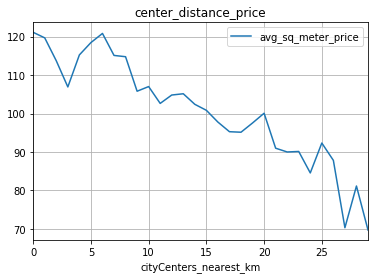

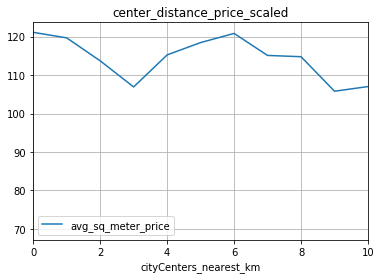

In [54]:
spb_km_price.plot(x='cityCenters_nearest_km', y='avg_sq_meter_price', grid=True, title='center_distance_price')
spb_km_price.plot(x='cityCenters_nearest_km', y='avg_sq_meter_price', xlim=(0, 10), grid=True, title='center_distance_price_scaled')

Построим график, который показывает, как цена зависит от удалённости от центра. 
В пределах 6 км удаленности от центра наблюдается некоторые колебания цены за квадрат, однако после этого значения цена имеет убывающий тренд (кроме отдельного пика в области 23 км). Будем считать 6 км границей центра.

In [55]:
spb_center_flats = spb_flats.query('cityCenters_nearest_km <=7')

Выделим сегмент квартир в центре. 

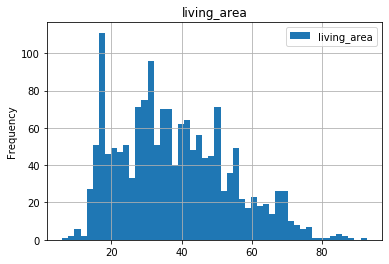

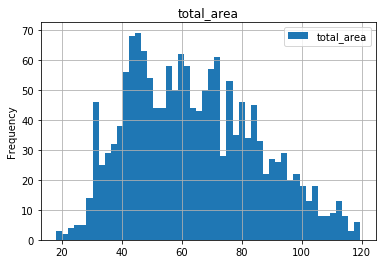

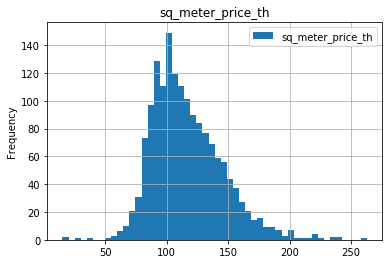

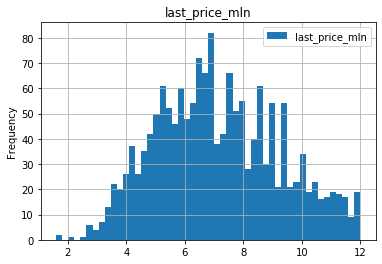

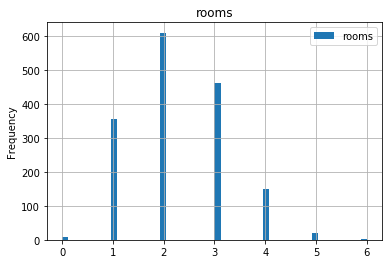

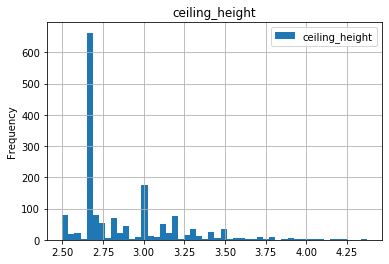

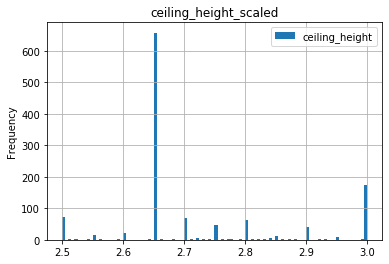

In [56]:
spb_center_flats.plot(y='living_area', kind='hist', bins=50, grid=True, title='living_area')
spb_center_flats.plot(y='total_area', kind='hist', bins=50, grid=True, title='total_area')
spb_center_flats.plot(y='sq_meter_price_th', kind='hist', bins=50, grid=True, title='sq_meter_price_th')
spb_center_flats.plot(y='last_price_mln', kind='hist', bins=50, grid=True, title='last_price_mln')
spb_center_flats.plot(y='rooms', kind='hist', bins=50, grid=True, title='rooms')
spb_center_flats.plot(y='ceiling_height', kind='hist', bins=50, grid=True, title='ceiling_height')
spb_center_flats.plot(y='ceiling_height', kind='hist', bins=100, range=(2.5, 3), grid=True, title='ceiling_height_scaled')

Проанализируем эту территорию. 
- Жилая и общая площади, а также высота потолка в центре примерно равны показателям по всей выборке
- Хотя самая частая цена за кв.м в центре такая же, как и в других районах, общее распределение цен заметно отличается - в центре основная часть значений лежит правее максимума, в остальной выборке - левее
- А вот общая цена квартиры в центре значительно выше - 7 млн (против 4 млн для всей выборки)
- В центре гораздно чаще встречаются 2х и 3х комнатные квартиры (а в общей выборке - 1 и 2х-комнатные)

In [57]:
print('total_area', spb_center_flats['sq_meter_price'].corr(spb_center_flats['total_area']))
print('living_area', spb_center_flats['sq_meter_price'].corr(spb_center_flats['living_area']))
print('kitchen_area', spb_center_flats['sq_meter_price'].corr(spb_center_flats['kitchen_area']))
print('rooms', spb_center_flats['sq_meter_price'].corr(spb_center_flats['rooms']))
print('cityCenters_nearest', spb_center_flats['sq_meter_price'].corr(spb_center_flats['cityCenters_nearest']))

total_area -0.4907612121496587
living_area -0.5189460922477496
kitchen_area -0.014743843496424366
rooms -0.5421547622412944
cityCenters_nearest 0.05562261128911782


Выделим факторы, которые влияют на стоимость квартиры в центре (число комнат, этаж, удалённость от центра, дата размещения объявления). 
- Цена за квадратный метр отрицательно зависит от общей площади, жилой площади и числа комнат (корреляция около 0,5 для всех трех параметров - это значительно выше, чем для полной выборки)
- Связи цены с удаленностью от центра и площадью кухни теперь почти нет

In [58]:
print('total_area', spb_center_flats['last_price'].corr(spb_center_flats['total_area']))
print('living_area', spb_center_flats['last_price'].corr(spb_center_flats['living_area']))
print('kitchen_area', spb_center_flats['last_price'].corr(spb_center_flats['kitchen_area']))
print('rooms', spb_center_flats['last_price'].corr(spb_center_flats['rooms']))
print('cityCenters_nearest', spb_center_flats['last_price'].corr(spb_center_flats['cityCenters_nearest']))

total_area 0.7036342613549517
living_area 0.5933131511836989
kitchen_area 0.46839587324573484
rooms 0.4614570962076559
cityCenters_nearest -0.1410813430863805


Порядок и абсолютные величины корреляции общей цены с различными параметрами схожи с результатами по общей выборке, но зависимость чуть слабее

In [59]:
price_weekday_pivot = spb_center_flats.pivot_table(index=['exposition_weekday'], values=['last_price_mln', 'sq_meter_price_th'], aggfunc='median').reset_index()
price_weekday_pivot

,exposition_weekday,last_price_mln,sq_meter_price_th
0,0,6.800,111.111111
1,1,7.100,108.333333
2,2,6.700,110.942249
3,3,6.670,109.799887
4,4,7.290,115.625000
5,5,6.999,119.607843
6,6,8.000,110.977242


С днями недели дела обстоят немного по другому, чем в общей выборке: теперь самая низкая цена за кв.м наблюдается во вторник, а не в пятницу, а самая высокая - в субботу (для общей выборки -  в среду).
Квартиры с самой большой общей ценой выставляются в воскресенье (в общей выборке в воскресенье, наоборот, выкладывали самые дешевые квартиры), а с самой низкой - в середине недели, в среду и четверг. 

In [60]:
price_month_pivot = spb_center_flats.pivot_table(index=['exposition_month'], values=['last_price_mln', 'sq_meter_price_th'], aggfunc='median').reset_index()
price_month_pivot

,exposition_month,last_price_mln,sq_meter_price_th
0,1,7.00,110.473458
1,2,7.30,112.688646
2,3,7.30,121.568627
3,4,6.85,110.000000
4,5,6.90,113.247863
5,6,6.98,107.716049
6,7,7.00,110.000000
7,8,6.70,113.093267
8,9,7.20,111.904762
9,10,6.80,108.653846


Цена за кв.м:
Пик цен виден в марте, относительно высоки цены в мае и августе, чуть ниже - в зимний период, на уровне около 110 тыс. за кв.м. Самые низкие цены наблюдаются в июне (для общей выборки спад был чуть раньше - в мае). 

Итоговые цены:
В лидерах февраль-март и сентябрь, дешевле всего - в августе и декабре (в общей выборке декабрь, наоборот, был самым дорогим месяцем).

In [61]:
price_year_pivot = spb_center_flats.pivot_table(index=['exposition_year'], values=['last_price_mln', 'sq_meter_price_th'], aggfunc='median').reset_index()
price_year_pivot

,exposition_year,last_price_mln,sq_meter_price_th
0,2015,6.600,101.836735
1,2016,6.860,106.557377
2,2017,6.965,109.640870
3,2018,6.970,115.076428
4,2019,7.300,126.946966


In [62]:
price_floor_pivot = spb_center_flats.pivot_table(index=['floor_group'], values=['last_price_mln', 'sq_meter_price_th'], aggfunc='median').reset_index()
price_floor_pivot

,floor_group,last_price_mln,sq_meter_price_th
0,другой,7.30,115.103996
1,первый,5.65,102.604167
2,последний,7.00,106.523058


Рост цен от года к году и нелюбовь покупателей к первым и последним этажам наблюдается как для центра города, так и в общей выборке.

## Общий вывод

В работе проанализированы основные характеристики квартир в Санкт-Петербурге и области, выявлено влияние различных факторов на цену жилья.

- Общая и жилая площадь примерно равны в центре и в общей выборке, наиболее частые значения составляют 45 и 18 кв.м соответственно
- Обычно цена за кв.м для центра и других районов схожа и составляет 100 тыс, однако в центре основная часть значений больше 100, а в других районах - преимущественно меньше 100
- В центре квартиры заметно дороже: если во всей выборке итоговые цены сосредоточены вокруг 4 млн, то в центре - вокруг 7 млн
- По всей выборке чаще встречаются однушки и двушки, а в центре самый популярный формат - это 2х и 3х-комнатные квартиры
- Высота потолка в обоих случаях сосредоточена в районе 2,65 м
- Среди топ-10 населенных пунктов с наибольших количеством объявлений о продаже самое дорогое жилье в Санкт-Петербурге, Сестрорецке и Пушкине, самое бюджетное - в Колпино, Красном Селе и Ломоносове.

- Среди факторов, определяющих цену квартиры, самые значимые - это площадь и количество комнат, с ростом этих параметров увеличивается общая цена квартиры и снижается цена за квадратный метр
- Наблюдается однозначная закономерность роста цен из года в год. Квартиры на первом и последнем этажах дешевле прочих. - эти выводы актуальны для всех районов, в т.ч. для центра. 
- Зависимость между днем размещения объявления и ценой квартиры неоднозначна
- В общей выборке прослеживается сезонность в ценах на квартиры - в зимние месяцы цены относительно высоки, в мае заметен спад, начиная с августа цены вновь плавно растут до декабря. Для центра города такой закономерности нет